## Aprendizado não supervisionado
### Aplicação do algorithm KMeans para clusterização de dados

In [174]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [175]:
input_file = 'train.csv'
columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 
           'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 
           'n_cores', 'pc', 'px_height', 'px_width', 'ram', 
           'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 
           'wifi', 'price_range', 'id']

# Load the data
df = pd.read_csv(input_file)

In [176]:
# sns.scatterplot(x='battery_power', y='ram', hue='price_range', data=df)

In [177]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

In [178]:
# normalizing min max
# x_train = preprocessing.normalize(df)
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
target = 'price_range'
x = df.loc[:, features].values
y = df.loc[:, target].values

# Normalize the data

# Min Max
x_minmax = MinMaxScaler().fit_transform(x)
normalized_minmax = pd.DataFrame(x_minmax, columns = features)
# normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis = 1)

# Z-Score
x_zscore = StandardScaler().fit_transform(x)
normalized_zscore = pd.DataFrame(x_zscore, columns = features)
# normalized_zscore = pd.concat([normalized_zscore, df[[target]]], axis = 1)



In [179]:
def plot_samples(projected, labels, title):    
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(title)
    plt.show()

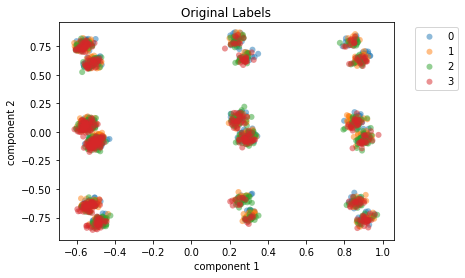

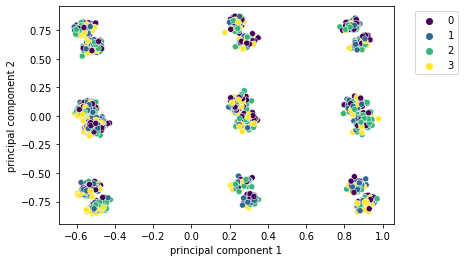

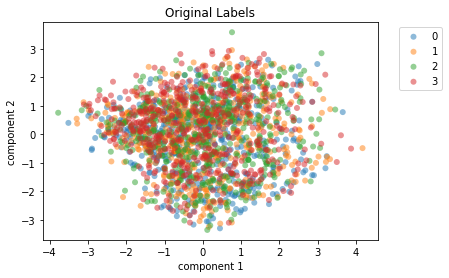

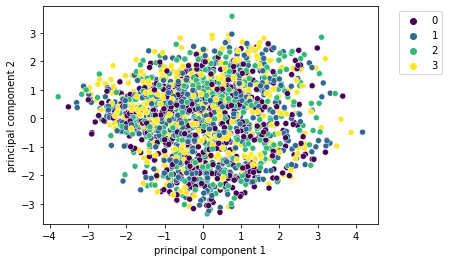

In [180]:
# PCA implementation
# Assuming 'x' is your feature set and 'df' is your original DataFrame

# Perform PCA with 2 components
def apply_pca(normalized):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(normalized)

    plot_samples(principalComponents, y, 'Original Labels')

    # Create a DataFrame with the principal components
    principal_breast_Df = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

    # Add the target variable to the principal component DataFrame
    principal_breast_Df[target] = df[target].values

    # Plot the scatter plot
    sns.scatterplot(x='principal component 1', y='principal component 2', hue=target, data=principal_breast_Df, palette='viridis')

    # Remove the target variable from the principal component DataFrame
    principal_breast_Df = principal_breast_Df.drop([target], axis=1)

    # Ajustar a posição da legenda
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    return principal_breast_Df
    

principal_breast_Df_minMax = apply_pca(normalized_minmax)

principal_breast_Df_zscore = apply_pca(normalized_zscore)

### SIMILARIDADE 
quão próximos ou distantes esses centroides estão uns dos outros no espaço de características.
### HOMOGENEIDADE
quão semelhantes são os tamanhos dos clusters.
### COEFICIENTE DA FORMA/SILHUETA
quão bem os objetos estão organizados em seus clusters.

In [181]:
# k_clusters = range(0, 3)
k_clusters = 12
def apply_kmeans(normalized):
        
    # k-centroids
    kmeans = KMeans(n_clusters=k_clusters, random_state=0, n_init=1).fit(normalized)

    #calculate the similarity between the centroids and the problems objects
    centroids = kmeans.cluster_centers_
    similarity = []
    for i in range(k_clusters):
        similarity.append(centroids[i].dot(centroids[i]))
        
    for i in range(k_clusters):
        print("The similarity between the centroid ", i, " and the rest of the centroids is: ", similarity[i])
    # print("The similarity between the centroids and the problems objects is: ", similarity)

    # TODO: calculate PCA 2 Components and substitute the x and y axis
    return kmeans

print("Min Max")
kmeans_minmax = apply_kmeans(normalized_minmax)
print()
print("Z-Score")
kmeans_zscore = apply_kmeans(normalized_zscore)




Min Max
The similarity between the centroid  0  and the rest of the centroids is:  5.873300180710585
The similarity between the centroid  1  and the rest of the centroids is:  6.088125890190456
The similarity between the centroid  2  and the rest of the centroids is:  5.135073028711563
The similarity between the centroid  3  and the rest of the centroids is:  6.628958286975237
The similarity between the centroid  4  and the rest of the centroids is:  6.271778510592821
The similarity between the centroid  5  and the rest of the centroids is:  4.428393301306361
The similarity between the centroid  6  and the rest of the centroids is:  4.443401547527477
The similarity between the centroid  7  and the rest of the centroids is:  5.119852061092585
The similarity between the centroid  8  and the rest of the centroids is:  7.56734989673644
The similarity between the centroid  9  and the rest of the centroids is:  6.746260346081168
The similarity between the centroid  10  and the rest of the ce

Min Max


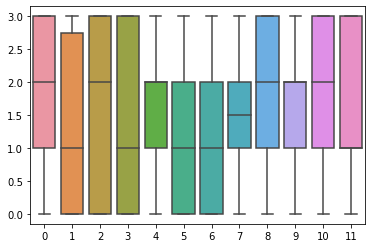

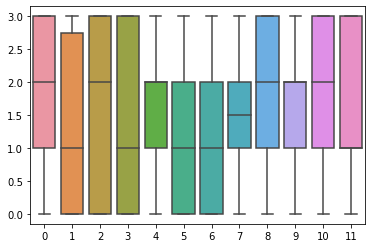


Z-Score


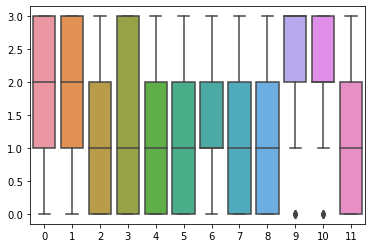

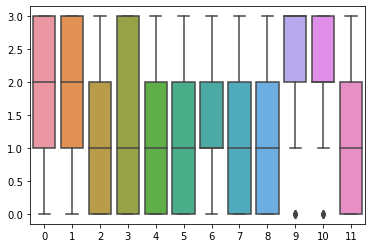

In [182]:
#TODO: plot the boxplot
def plot_boxplot(kmeans, normalized, principal_breast_Df):
    sns.boxplot(x=kmeans.labels_, y=y, data=normalized)
    plt.show()
    sns.boxplot(x=kmeans.labels_, y=y, data=principal_breast_Df)
    plt.show()
    
# sns.boxplot(x=kmeans.labels_, y=y, data=normalized_minmax)
# plt.show()
# sns.boxplot(x=kmeans.labels_, y=y, data=principal_breast_Df) 
print ("Min Max")
plot_boxplot(kmeans_minmax, normalized_minmax, principal_breast_Df_minMax)
print()
print ("Z-Score")
plot_boxplot(kmeans_zscore, normalized_zscore, principal_breast_Df_zscore)

In [183]:
def calc_silhouette(normalized, kmeans):
    # calculate the silhouette score
    silhouette_avg = silhouette_score(normalized, kmeans.labels_, metric='euclidean')
    print("The average silhouette_score is :", silhouette_avg)
    
# # calculate the silhouette score
# silhouette_avg = silhouette_score(normalized_minmax, kmeans.labels_, metric='euclidean')
# print("The average silhouette_score is :", silhouette_avg)

# # Add the cluster labels to the dataframe
# df['cluster'] = kmeans.labels_

print("Min Max")
calc_silhouette(normalized_minmax, kmeans_minmax)

print()
print("Z-Score")
calc_silhouette(normalized_zscore, kmeans_zscore)

Min Max
The average silhouette_score is : 0.09029002378568898

Z-Score
The average silhouette_score is : 0.04347546380652709


In [184]:
k_clusters_range = range(0, k_clusters)  # Start from 1 to 2, resulting in 2 to 3 clusters
def calc_silhouette(normalized, kmeans):
    fits = []
    scores = []
    for k in k_clusters_range:
        kmeans = KMeans(n_clusters=k+1, random_state=0, n_init=1).fit(normalized)
        fits.append(kmeans)
        labels = kmeans.labels_
        if len(set(labels)) > 1:  # Check if we have more than one cluster
            score = silhouette_score(normalized, labels, metric='euclidean')
            scores.append(score)
        else:
            scores.append(None)  # Or handle the case where there's only one cluster in some other way

    # Printing scores to verify output
    for idx, sc in enumerate(scores):
        print(f"Silhouette score for {idx+1} clusters: {sc}")
        
    return fits, scores
# print(fits)

print("Min Max")
fits_minmax, score_minmax = calc_silhouette(normalized_minmax, kmeans_minmax)

print()
print("Z-Score")
fits_zscore, score_zscore = calc_silhouette(normalized_zscore, kmeans_zscore)


Min Max


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Silhouette score for 1 clusters: None
Silhouette score for 2 clusters: 0.11708448482288923
Silhouette score for 3 clusters: 0.07799722530571844
Silhouette score for 4 clusters: 0.07698917377944857
Silhouette score for 5 clusters: 0.08551868526701233
Silhouette score for 6 clusters: 0.08543064984181692
Silhouette score for 7 clusters: 0.092415491409952
Silhouette score for 8 clusters: 0.0822166317363745
Silhouette score for 9 clusters: 0.08456989050384103
Silhouette score for 10 clusters: 0.08204761908725769
Silhouette score for 11 clusters: 0.08021035431405846
Silhouette score for 12 clusters: 0.09029002378568898

Z-Score


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Silhouette score for 1 clusters: None
Silhouette score for 2 clusters: 0.06771623890102013
Silhouette score for 3 clusters: 0.0657538495080212
Silhouette score for 4 clusters: 0.057508887748453946
Silhouette score for 5 clusters: 0.0538718665209512
Silhouette score for 6 clusters: 0.047828505369957586
Silhouette score for 7 clusters: 0.042483086573165296
Silhouette score for 8 clusters: 0.04763916161544523
Silhouette score for 9 clusters: 0.044146669520034265
Silhouette score for 10 clusters: 0.04360718731575835
Silhouette score for 11 clusters: 0.04419886284959383
Silhouette score for 12 clusters: 0.04347546380652709


Min Max


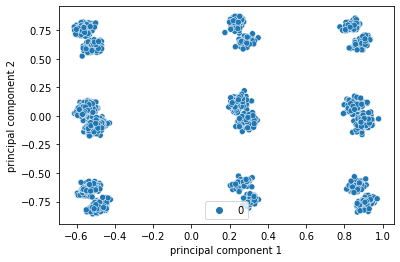

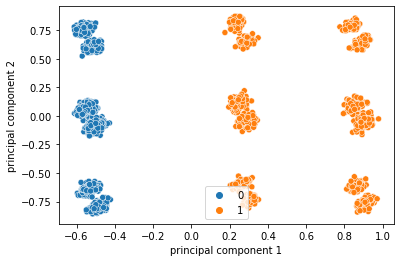

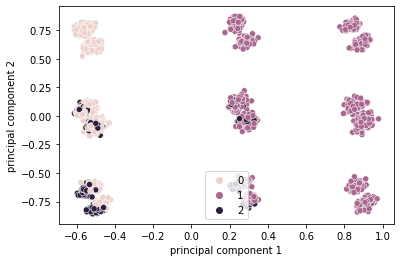

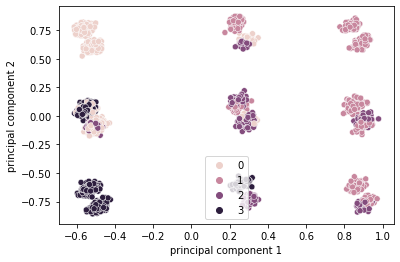

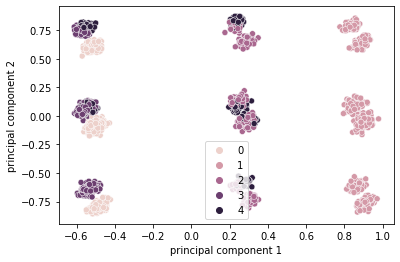

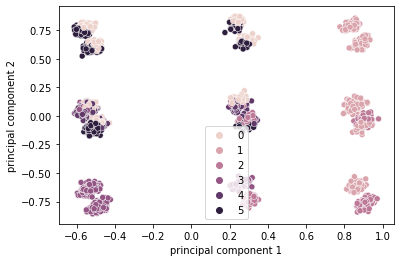

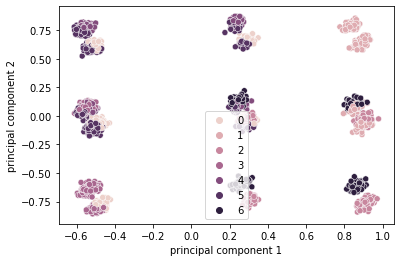

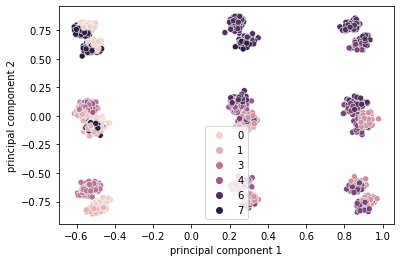

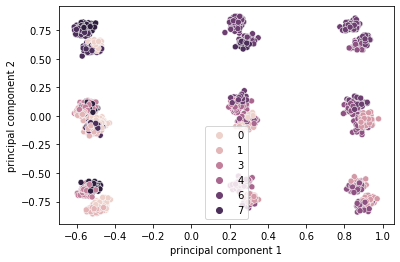

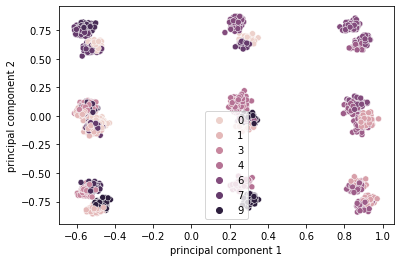

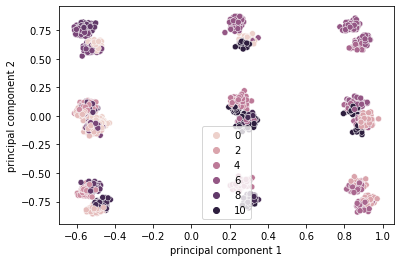

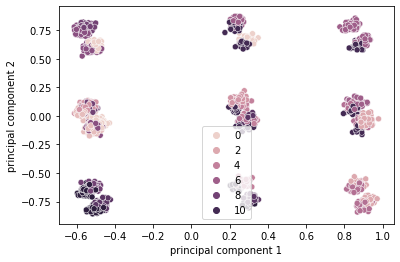


Z-Score


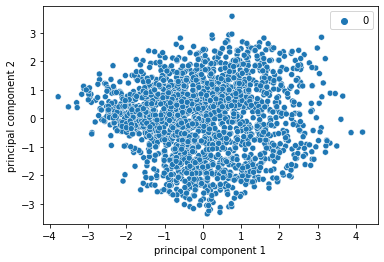

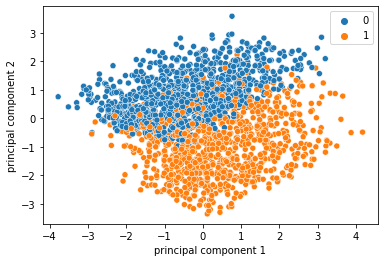

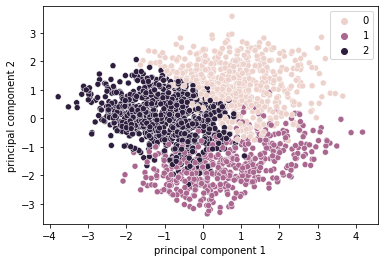

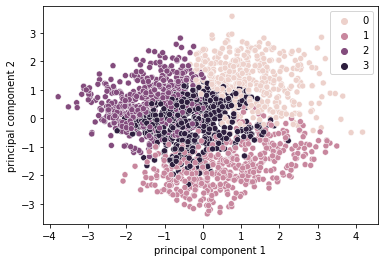

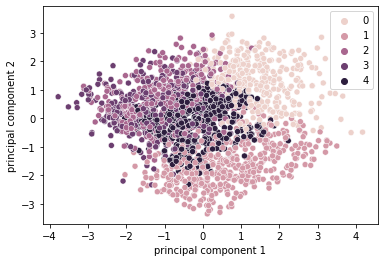

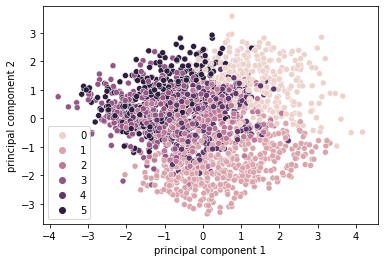

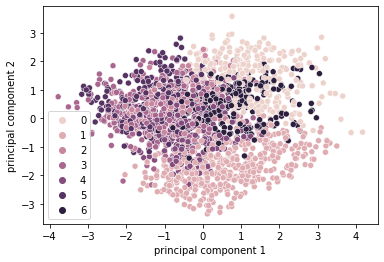

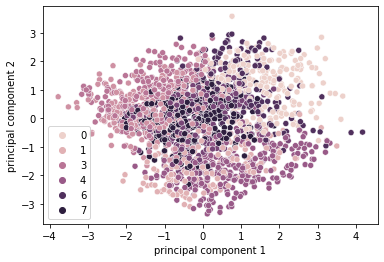

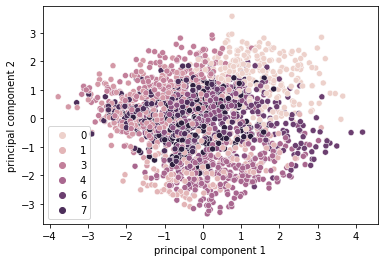

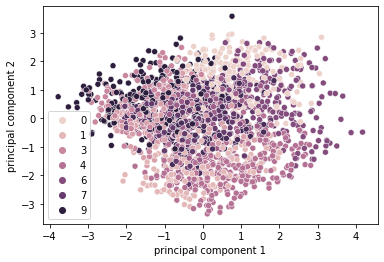

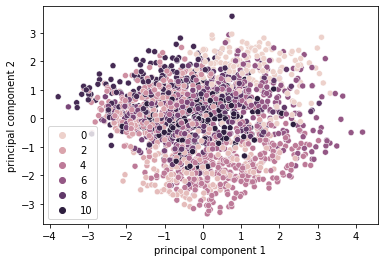

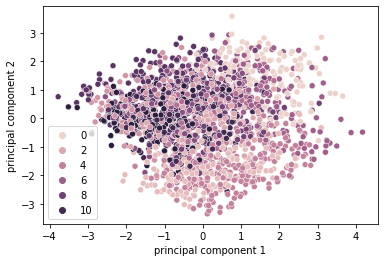

In [185]:
def plot_silhouette(principal_breast_Df, fits):
    for i in range(0, k_clusters):
        # sns.scatterplot(data = normalized_minmax, x = 'battery_power', y = 'ram', hue = fits[i].labels_)
        sns.scatterplot(data = principal_breast_Df, x='principal component 1', y='principal component 2', hue = fits[i].labels_)
        plt.show()

print("Min Max")
plot_silhouette(principal_breast_Df_minMax, fits_minmax)
print()
print("Z-Score")
plot_silhouette(principal_breast_Df_zscore, fits_zscore)

Min Max

Z-Score


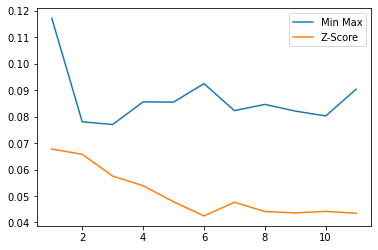

In [189]:
print ("Min Max")
sns.lineplot(x = k_clusters_range, y = score_minmax, label='Min Max')
print()
print ("Z-Score")
sns.lineplot(x = k_clusters_range, y = score_zscore, label='Z-Score')
plt.legend()


In [187]:
# os graficos sobre boxplot foram retirados devido a nossa base de dados ser para classificação e não para regressão

# for i in range (0, k_clusters):
#     sns.boxplot(x = fits[i].labels_, y = y)
#     plt.show()